In [4]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_dim_by_variation_210330'

db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/batch_similarity_by_noise_210329_data/'

db = {}
db['data'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_data_0.3_512_5.gz')
db['global_random'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_global_random_0.3_512_5.gz')
db['random'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_random_0.3_512_5.gz')
db['naive_random_21'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_naive_random_21_0.3_512_5.gz')
db['naive_random_15'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_naive_random_15_0.3_512_5.gz')
db['naive_random_17'] = compress_pickle.load(
    db_path+'batch_similarity_by_noise_210329_naive_random_17_0.3_512_5.gz')


Height: 3.15, Aspect: 1.1904761904761905


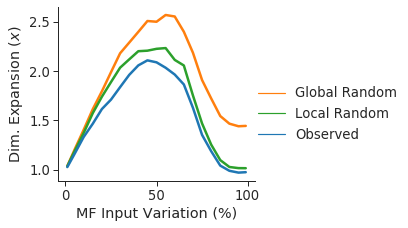

In [7]:

name_map = {
        'data': "Observed",
        'global_random': "Global Random",
        'naive_random_17': "Local Random",
}

palette = {
    name_map['data']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['naive_random_17']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['naive_random_17'][0][0]
for model_name in [
        'global_random',
        'naive_random_17',
        'data',
        ]:
    ress = db[model_name]
    ress = ress[0]  # get the first element in tuple
    ress = ress[0]  # get the first try
    for noise in ress:
#         print(noise)
        res = ress[noise]
        res_ref = ress_ref[noise]
        hamming_distance_norm = res['hamming_distance']/res['num_grcs']
        mpd.add_data_point(
            model=name_map[model_name],
            # mf_dim=res[0]['mf_dim'],
#             activation_level=activation_level,
            noise=noise*100,
            grc_dim=res['grc_dim'],
            grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
            grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
#             grc_dim_normed=res['grc_dim']/800,
            # pct_mf_dim=res['pct_mf_dim']/100,
            num_grcs=res['num_grcs'],
            num_mfs=res['num_mfs'],
            voi=res['voi'],
            grc_pop_corr=res['grc_pop_corr'],
            binary_similarity=res['binary_similarity'],
            hamming_distance=res['hamming_distance'],
            hamming_distance_norm=hamming_distance_norm,
            # hamming_distance_norm_max=hamming_distance_norm_max,
            )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
#     y='grc_by_mf_dim',
    y='grc_by_mf_dim_ref',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2.5,
    width=3.75,
    height=3.15,
#     ylim=[0, None],
#     custom_legend_loc='lower right',
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='MF Input Variation (%)',
    save_filename=f'{script_n}_act_30.svg',
    show=True,
    )
